In [ ]:
#Data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
#import category_encoders as ce

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test (2).csv
Saving Data Train.csv to Data Train (2).csv


In [ ]:
datatrain = pd.read_csv('Data Train.csv')
datatest = pd.read_csv('Data Test.csv')
datatrain.shape, datatest.shape

((4250, 20), (750, 20))

**EDA**

In [ ]:
datatrain.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
datatrain.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [ ]:
datatrain.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
datatrain.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [ ]:
datatrain.head(20)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [ ]:
datatrain.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:
datatrain.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
datatest.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

<Axes: xlabel='churn', ylabel='count'>

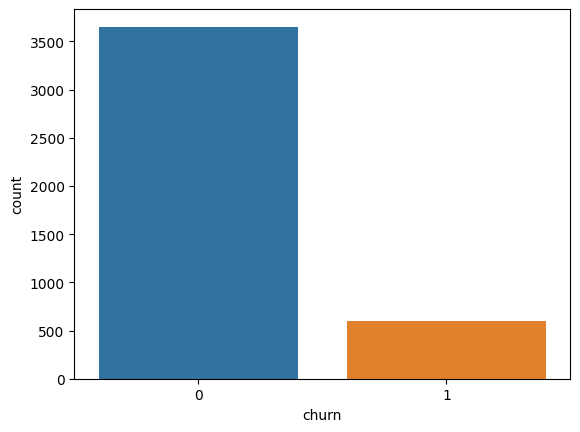

In [ ]:
datatrain.churn=datatrain.churn.map({"no":0, "yes":1})
sns.countplot(x = datatrain.churn)

In [ ]:
datatrain['international_plan'] = datatrain['international_plan'].map({"no":0, "yes":1})
datatrain['voice_mail_plan'] = datatrain['voice_mail_plan'].map({"no":0, "yes":1})

In [ ]:
datatrain['total_calls'] = datatrain['total_day_calls'] + datatrain['total_eve_calls'] + datatrain['total_night_calls'] + datatrain['total_intl_calls']
datatrain['total_charges'] = datatrain['total_day_charge'] + datatrain['total_eve_charge'] + datatrain['total_night_charge'] + datatrain['total_intl_charge']
datatrain['total_mins'] = datatrain['total_day_minutes'] + datatrain['total_eve_minutes'] + datatrain['total_night_minutes'] + datatrain['total_intl_minutes']

**Feature Selection**

In [ ]:
def woe_discrete(df,discrete_var,good_bad_var):
    df = pd.concat([df[discrete_var],good_bad_var], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].sum(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count()], axis = 1)
    df = df.iloc[:, [0,1,3]]
    df.columns = [df.columns.values[0], 'n_good', 'n_obs']
    df['n_bad'] = df['n_obs'] - df['n_good']
    df['prop_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_good'] / df['prop_bad'])
    df['IV'] = ((df['prop_good'] - df['prop_bad']) * df['WoE']).sum()
    df = df.sort_values('WoE', ascending = True)
    df = df.reset_index(drop = True)
    return df

In [ ]:
woe_discrete(datatrain,'international_plan',y)

,international_plan,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,0,431,3854,3423,0.720736,0.937295,-0.262725,0.380372
1,1,167,396,229,0.279264,0.062705,1.493711,0.380372


In [ ]:
woe_discrete(datatrain,'voice_mail_plan',y)

,voice_mail_plan,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,1,82,1112,1030,0.137124,0.282037,-0.721155,0.131148
1,0,516,3138,2622,0.862876,0.717963,0.183854,0.131148


In [ ]:
woe_discrete(datatrain,'state',y)

,state,n_good,n_obs,n_bad,prop_good,prop_bad,WoE,IV
0,VA,5,100,95,0.008361,0.026013,-1.134999,0.176148
1,HI,4,77,73,0.006689,0.019989,-1.094726,0.176148
2,AK,4,61,57,0.006689,0.015608,-0.847317,0.176148
3,NE,5,73,68,0.008361,0.018620,-0.800630,0.176148
4,RI,6,87,81,0.010033,0.022180,-0.793250,0.176148
5,WI,7,94,87,0.011706,0.023823,-0.710558,0.176148
6,IL,6,79,73,0.010033,0.019989,-0.689260,0.176148
7,NC,7,80,73,0.011706,0.019989,-0.535110,0.176148
8,ND,6,67,61,0.010033,0.016703,-0.509675,0.176148
9,AZ,7,77,70,0.011706,0.019168,-0.493146,0.176148


In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
make_mi_scores(datatrain.drop(['area_code','state','churn',],axis = 1), y)

total_charges                    0.106360
total_day_minutes                0.062899
total_day_charge                 0.060267
total_mins                       0.046121
number_customer_service_calls    0.037605
international_plan               0.035313
voice_mail_plan                  0.018187
total_night_charge               0.015671
number_vmail_messages            0.012592
total_calls                      0.008037
total_night_minutes              0.006236
total_intl_minutes               0.005867
total_night_calls                0.000000
total_eve_charge                 0.000000
total_intl_calls                 0.000000
total_intl_charge                0.000000
total_eve_calls                  0.000000
total_eve_minutes                0.000000
total_day_calls                  0.000000
account_length                   0.000000
Name: MI Scores, dtype: float64

In [ ]:
x = datatrain[['total_charges','total_mins', 'number_customer_service_calls', 'state','international_plan', 'churn','voice_mail_plan', 'total_intl_charge','total_intl_minutes','total_intl_calls']]
x.head()

,total_charges,total_mins,number_customer_service_calls,state,international_plan,churn,voice_mail_plan,total_intl_charge,total_intl_minutes,total_intl_calls
0,59.24,625.2,1,OH,0,0,1,3.70,13.7,3
1,62.29,539.4,0,NJ,0,0,0,3.29,12.2,5
2,66.80,564.8,2,OH,1,0,0,1.78,6.6,7
3,52.09,512.0,3,OK,1,0,0,2.73,10.1,3
4,78.31,786.8,3,MA,0,0,1,2.03,7.5,7


**Model Training**

In [ ]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier

    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report

    # assign x and y, get dummies (sparse matrix - object to integer)
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]
    x=pd.get_dummies(x,drop_first=True)
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=2)
    x, y = sm.fit_resample(x, y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()

    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']

    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]

    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))

    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [ ]:
classification_funct(x, 'churn')

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

,f1_score,recall_score,precision_score,accuracy_score
XGBClassifier,0.976242,0.964438,0.988338,0.977413
RandomForestClassifier,0.938182,0.917496,0.959821,0.941821
GaussianNB,0.877167,0.827881,0.932692,0.888433
DecisionTreeClassifier,0.875964,0.889047,0.863260,0.878850
BernoulliNB,0.865737,0.839260,0.893939,0.874743
LogisticRegression,0.855516,0.854908,0.856125,0.861054
KNeighborsClassifier,0.867142,0.951636,0.796429,0.859685
SVC,0.565492,0.445235,0.774752,0.670773


**Model Validation**

In [ ]:
from xgboost import XGBClassifier
XGB=XGBClassifier()

In [ ]:
x.drop('churn', axis = 1, inplace = True)
x.columns

<ipython-input-96-1bb957af16f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop('churn', axis = 1, inplace = True)


Index(['total_charges', 'total_mins', 'number_customer_service_calls', 'state',
       'international_plan', 'voice_mail_plan', 'total_intl_charge',
       'total_intl_minutes', 'total_intl_calls'],
      dtype='object')

In [ ]:
x = pd.get_dummies(x, drop_first=True)
x.shape

(4250, 58)

In [ ]:
XGB.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
datatest['international_plan']=datatest['international_plan'].map({"no":0,"yes":1})
datatest['voice_mail_plan']=datatest['voice_mail_plan'].map({"no":0,"yes":1})
datatest['total_calls'] = datatest['total_day_calls'] + datatest['total_eve_calls'] + datatest['total_night_calls'] + datatest['total_intl_calls']
datatest['total_charges'] = datatest['total_day_charge'] + datatest['total_eve_charge'] + datatest['total_night_charge'] + datatest['total_intl_charge']
datatest['total_mins'] = datatest['total_day_minutes'] + datatest['total_eve_minutes'] + datatest['total_night_minutes'] + datatest['total_intl_minutes']

In [ ]:
datatest_x = datatest[['total_charges','total_mins', 'number_customer_service_calls', 'state','international_plan','voice_mail_plan', 'total_intl_charge','total_intl_minutes','total_intl_calls']]
datatest_x.columns

Index(['total_charges', 'total_mins', 'number_customer_service_calls', 'state',
       'international_plan', 'voice_mail_plan', 'total_intl_charge',
       'total_intl_minutes', 'total_intl_calls'],
      dtype='object')

In [ ]:
datatest_x= pd.get_dummies(datatest_x,drop_first=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
y_hat = XGB.predict(datatest_x)

In [ ]:
submission = pd.DataFrame({"id":datatest.index, 'churn':y_hat})
submission.head()

,id,churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
submission.to_csv('submission.csv', index=False)